# Super Store Sales Forecasting

<b>Problem Statement: </b>Predict what will be the demand for each category of products in next month 

## Reading the data

In [1]:
import pandas as pd
import numpy as np

# Suppressing scientific notation
np.set_printoptions(suppress=True)

StoreSalesData=pd.read_excel('Super Store Sales data.xls')
StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,Philippines,Southeast Asia,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014


## Looking at the data summary

In [2]:
StoreSalesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         11000 non-null  int64         
 1   Order ID       11000 non-null  object        
 2   Order Date     11000 non-null  datetime64[ns]
 3   Ship Date      11000 non-null  datetime64[ns]
 4   Ship Mode      11000 non-null  object        
 5   Customer ID    11000 non-null  object        
 6   Customer Name  11000 non-null  object        
 7   Segment        11000 non-null  object        
 8   City           11000 non-null  object        
 9   State          11000 non-null  object        
 10  Country        11000 non-null  object        
 11  Region         11000 non-null  object        
 12  Product ID     11000 non-null  object        
 13  Category       11000 non-null  object        
 14  Sub-Category   11000 non-null  object        
 15  Product Name   1100

## Observing the Quantitative, Qualitative and Categorical variables in data

In [3]:
StoreSalesData.nunique()

Row ID           11000
Order ID          5436
Order Date        1265
Ship Date         1378
Ship Mode            4
Customer ID        795
Customer Name      795
Segment              3
City               655
State              179
Country             23
Region               4
Product ID        2721
Category             3
Sub-Category        17
Product Name      1913
Sales             8815
Quantity            14
Discount            19
Profit            8120
dtype: int64

## Feature Engineering in data

In [4]:
# Function to get month from a date
def Function_get_month(inpDate):
    return(inpDate.month)

# Function to get Year from a date
def Function_get_year(inpDate):
    return(inpDate.year)


# Creating new columns
StoreSalesData['Month']=StoreSalesData['Order Date'].apply(Function_get_month)
StoreSalesData['Year']=StoreSalesData['Order Date'].apply(Function_get_year)

StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,8,2013
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420,8,2013
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,8,2013
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,8,2013
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,...,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,6,2014


In [5]:
# Checking unique values in Year Column
StoreSalesData['Year'].unique()

array([2013, 2014, 2011, 2012], dtype=int64)

In [6]:
# Checking unique values in Month column
StoreSalesData['Month'].unique()

array([ 8,  6,  5,  1,  7,  2, 10,  9,  3, 11,  4, 12], dtype=int64)

## Sales Quantity for each month

In [7]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=StoreSalesData['Month'],
            index=StoreSalesData['Year'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,328,361,442,406,517,631,388,737,722,837,856,1028
2012,531,425,427,427,901,924,380,978,728,1092,1068,847
2013,665,448,527,448,1228,1273,716,1307,1220,1021,1010,1120
2014,951,704,890,727,1284,1416,738,1478,1302,1588,1632,1548


In [8]:
pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData['Month'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum').melt()

,Year,value
0,2011,328
1,2011,361
2,2011,442
3,2011,406
4,2011,517
5,2011,631
6,2011,388
7,2011,737
8,2011,722
9,2011,837


## Visualizing the Total sales Quantity per month

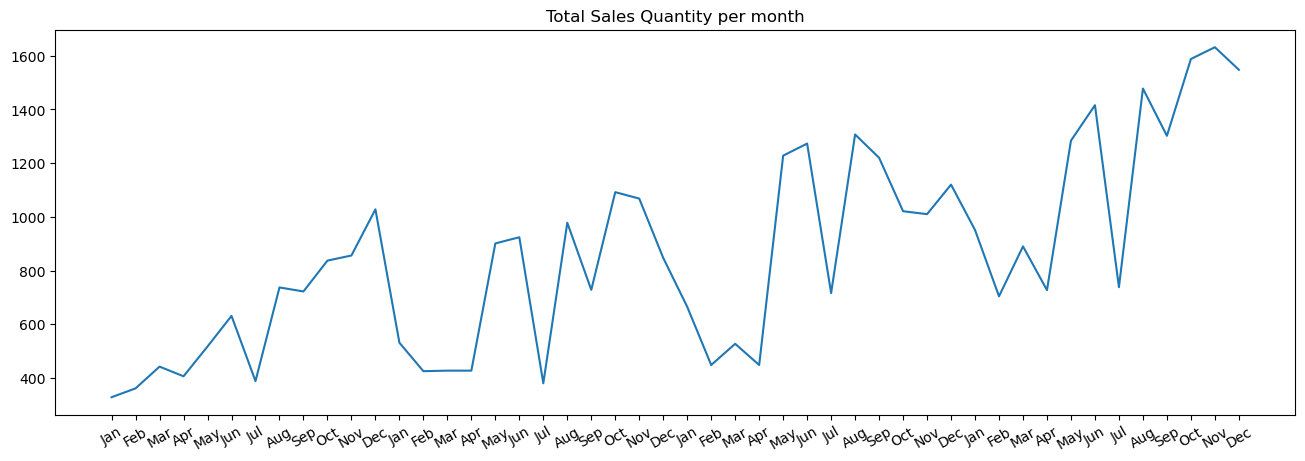

In [9]:
import matplotlib.pyplot as plt
SalesQuantity=pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData['Month'],
            values=StoreSalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
%matplotlib inline
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [10]:
SalesQuantity.values

array([ 328,  361,  442,  406,  517,  631,  388,  737,  722,  837,  856,
       1028,  531,  425,  427,  427,  901,  924,  380,  978,  728, 1092,
       1068,  847,  665,  448,  527,  448, 1228, 1273,  716, 1307, 1220,
       1021, 1010, 1120,  951,  704,  890,  727, 1284, 1416,  738, 1478,
       1302, 1588, 1632, 1548], dtype=int64)

C:\Users\payel\AppData\Local\Temp\ipykernel_16744\766735520.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(series, freq=12)


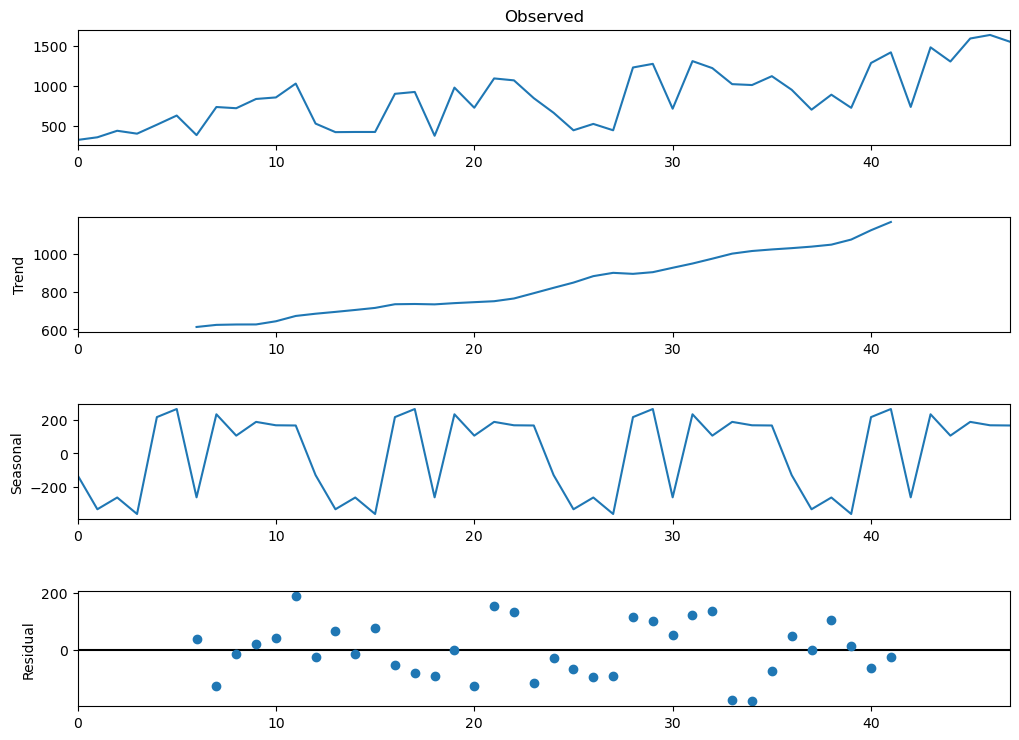

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = SalesQuantity.values
result = seasonal_decompose(series, freq=12)
#print(result.trend)
#print(result.seasonal)
#print(result.resid)
#print(result.observed)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

## Creating the predictive model for Total Sales Data

Next Six Month Forecast: 49    1070.817475
50    1225.492810
51    1083.310860
52    1533.152837
53    1621.840655
54    1106.357155
Name: Forecast, dtype: float64
#### Accuracy of model: 78.62 ####


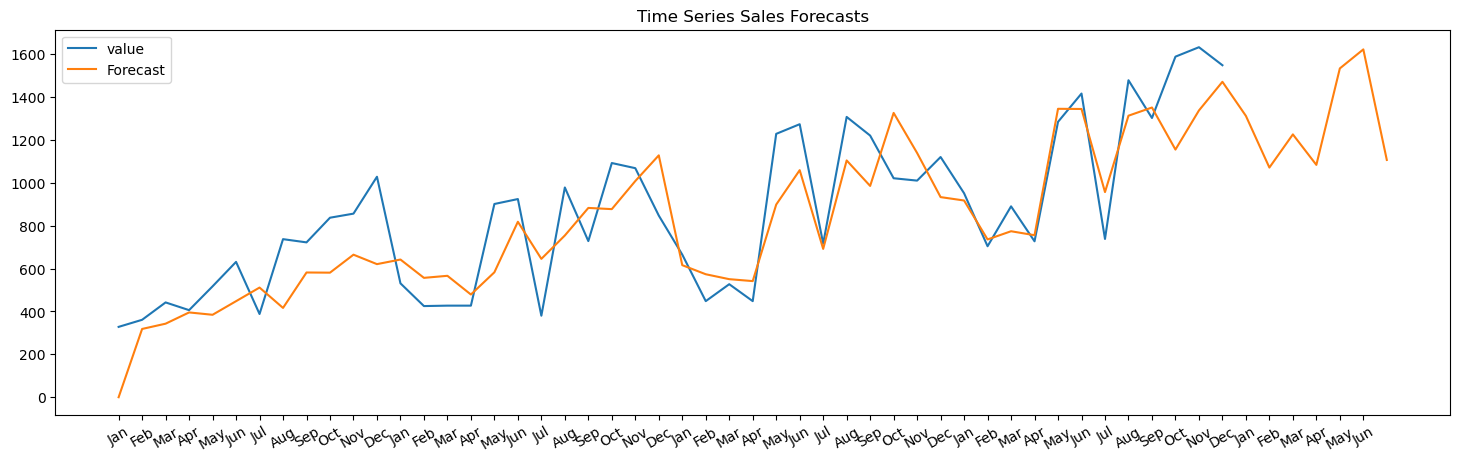

In [12]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')


# Train the model on the full dataset 
SarimaxModel = SARIMAX(SalesQuantity,  
                        order = (1, 1, 4),  
                        seasonal_order =(1, 0, 0, 12))
SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity)) + 6,
                          typ = 'levels').rename('Forecast')
print("Next Six Month Forecast:",forecast[-6:])

# Plot the forecast values
SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(legend = True, figsize=(18,5))

# Measuring the Training accuracy of the model
MAPE=np.mean(abs(SalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)

## Drilling down category wise

In [13]:
StoreSalesData.groupby(['Category']).sum()

,Row ID,Sales,Quantity,Discount,Profit,Month,Year
Category,,,,,,,
Furniture,13299177,1.343623e+06,9096,335.49,125927.2905,17839,4887064
Office Supplies,33974643,8.843154e+05,23133,974.29,105512.4025,45768,12430938
Technology,13231680,1.357490e+06,8993,327.15,204593.8560,17465,4822535


## For 'Technology' category
#### Choosing Technology category because it has the highest profits

In [14]:
# Filtering only Technology data
TechnologySalesData=StoreSalesData[StoreSalesData['Category']=='Technology']

### Sales Quantity per month for Technology category

In [15]:
# Aggregating the sales quantity for each month for all categories
pd.crosstab(columns=TechnologySalesData['Month'],
            index=TechnologySalesData['Year'],
            values=TechnologySalesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,70,102,106,65,138,143,100,190,103,159,195,228
2012,132,108,108,79,211,218,89,223,133,306,209,159
2013,140,100,127,92,216,307,185,280,253,209,270,221
2014,178,174,191,162,285,291,162,299,263,321,363,330


### Visualizing the Sales Quantity for Technology category

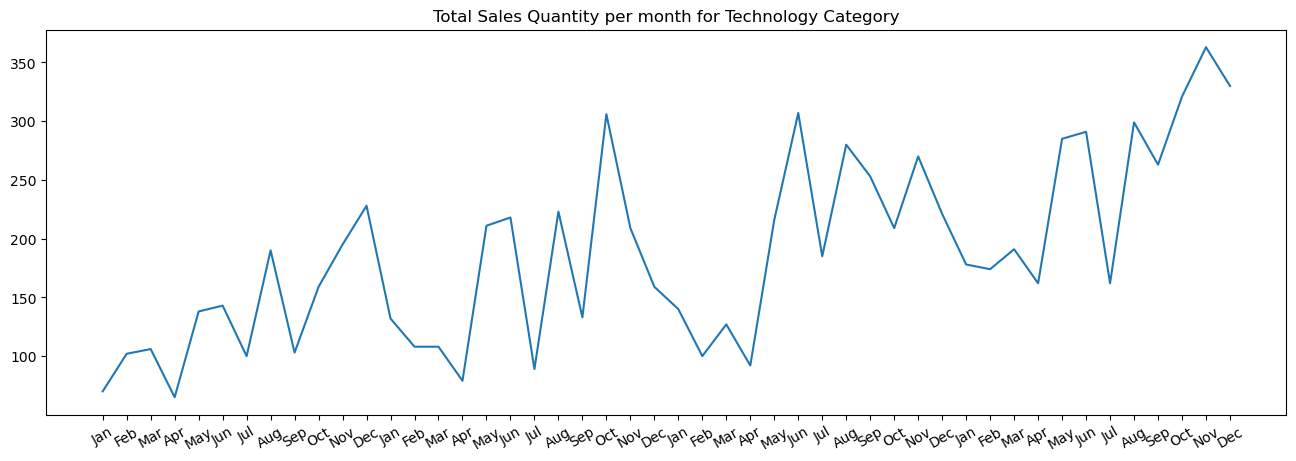

In [16]:
import matplotlib.pyplot as plt
SalesQuantity=pd.crosstab(columns=TechnologySalesData['Year'],
            index=TechnologySalesData['Month'],
            values=TechnologySalesData['Quantity'],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

# Plotting the sales
SalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Technology Category')
# Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

### Creating the predictive model for Technology Category

Next Six Month Forecast: 49    174.387955
50    193.505975
51    178.859962
52    336.161838
53    382.110764
54    195.721914
Name: Forecast, dtype: float64
#### Accuracy of model: 77.26 ####


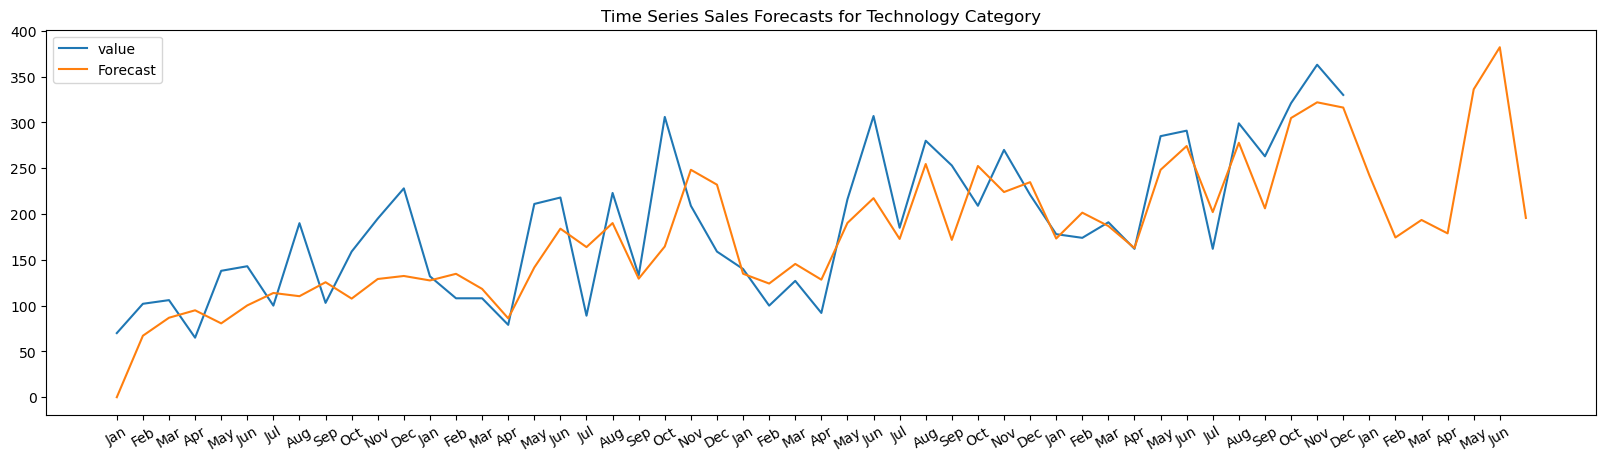

In [17]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Train the model on the full dataset 
SarimaxModel = model = SARIMAX(SalesQuantity, 
                        order = (5, 0, 1),  
                        seasonal_order =(10, 0, 0, 12))

SalesModel = SarimaxModel.fit()
  
# Forecast for the next 6 months
forecast = SalesModel.predict(start = 0,
                          end = (len(SalesQuantity)) + 6,
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
SalesQuantity.plot(figsize = (20, 5), legend = True, title='Time Series Sales Forecasts for Technology Category')
forecast.plot(legend = True, figsize=(20,5))

print("Next Six Month Forecast:",forecast[-6:])

# Measuring the accuracy of the model
MAPE=np.mean(abs(SalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

# Printing month names in X-Axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=30)

## For 'Office Supplies' category

In [18]:
# Filtering only 'Office Supplies' data 
OfficeSuppliesData=StoreSalesData[StoreSalesData['Category']=='Office Supplies']

#### Sales Quantity per month for Office Supplies category

In [19]:
# Aggregating the sales quantity for each month for Office Supplies categories
pd.crosstab(columns=OfficeSuppliesData['Month'],
            index=OfficeSuppliesData['Year'],
            values=OfficeSuppliesData['Quantity'],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,214,177,241,259,258,312,229,361,449,473,467,588
2012,265,215,225,246,539,543,217,562,465,615,610,513
2013,349,238,283,237,738,719,367,729,658,565,521,637
2014,547,363,439,391,758,833,410,903,705,892,916,892


#### Visualizing the Sales Quantity for Office Supplies category

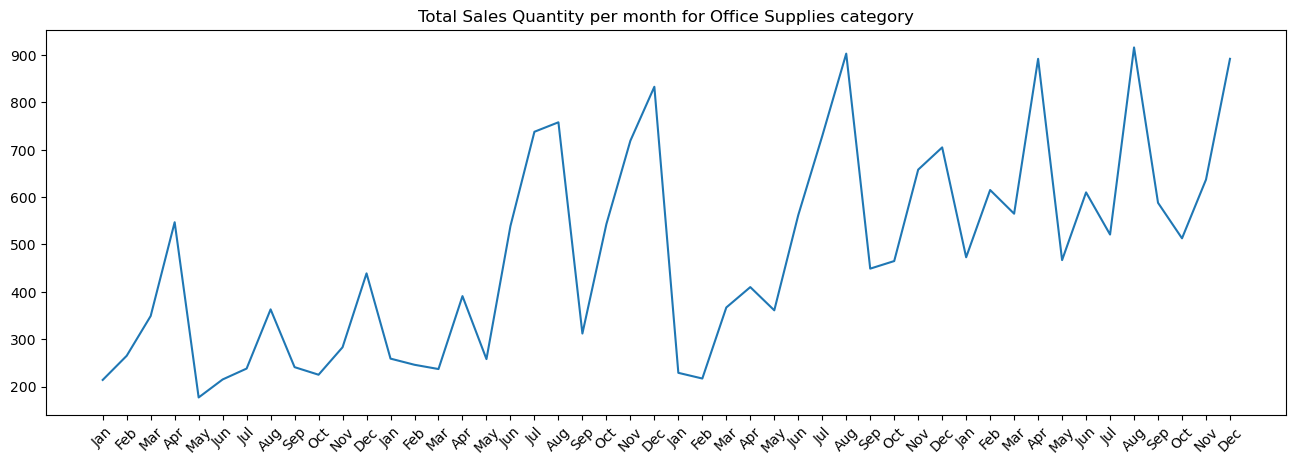

In [20]:

import matplotlib.pyplot as plt
OfficeSalesQuantity=pd.crosstab(columns=OfficeSuppliesData['Month'],
                    index=OfficeSuppliesData['Year'],
                    values=OfficeSuppliesData['Quantity'],
                    aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

#Plotting the sales
OfficeSalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Office Supplies category')
#Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=45)

#### Creating the predictive model for Office Supplies Category

Next six month forecast: 49    174.387955
50    193.505975
51    178.859962
52    336.161838
53    382.110764
54    195.721914
Name: Forecast, dtype: float64
#### Accuracy of the model: 75.75 ####


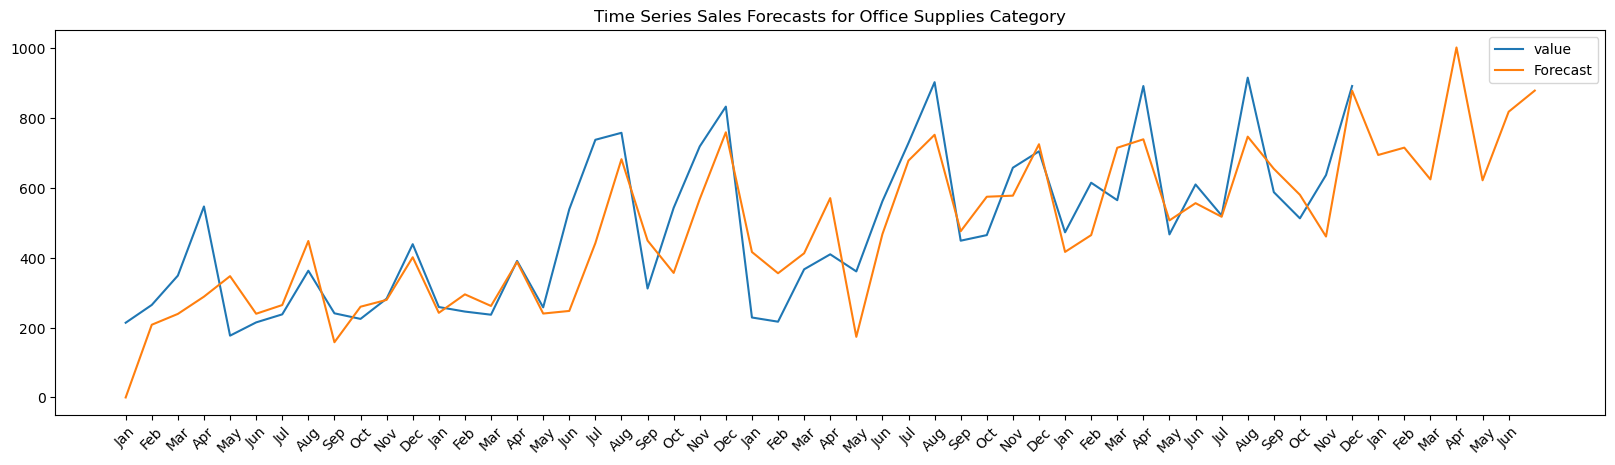

In [21]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

#Train the model on full dataset
SarimaxModel=model=SARIMAX(OfficeSalesQuantity,
                          order = (9,1,1),
                          seasonal_order = (4,0,0,12))
OfficeSalesModel= SarimaxModel.fit()

#forecast for next 6 months
officeforecast= OfficeSalesModel.predict(start=0,
                                        end=(len(OfficeSalesQuantity))+6,
                                        typ='levels').rename('Forecast')

#plot the forecast values
OfficeSalesQuantity.plot(figsize=(20,5), legend= True, title='Time Series Sales Forecasts for Office Supplies Category')
officeforecast.plot(legend= True, figsize=(20,5))

print("Next six month forecast:",forecast[-6:])

#Measuring the accuracy of the model
MAPE=np.mean(abs(OfficeSalesQuantity-officeforecast)/OfficeSalesQuantity)*100
print('#### Accuracy of the model:', round(100-MAPE,2), '####')

#printing month names in x axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=45)

## For 'Furniture' category

In [22]:
# Filtering only 'Furniture' data 
FurnitureData=StoreSalesData[StoreSalesData['Category']=='Furniture']

#### Sales Quantity per month for Furniture category

In [23]:
# Aggregating the sales quantity for each month for Furniture categories
pd.crosstab(columns=FurnitureData['Month'],
            index=FurnitureData['Year'],
            values=FurnitureData['Quantity'],
            aggfunc='sum')


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,44,82,95,82,121,176,59,186,170,205,194,212
2012,134,102,94,102,151,163,74,193,130,171,249,175
2013,176,110,117,119,274,247,164,298,309,247,219,262
2014,226,167,260,174,241,292,166,276,334,375,353,326


#### Visualizing the Sales Quantity for Furniture category

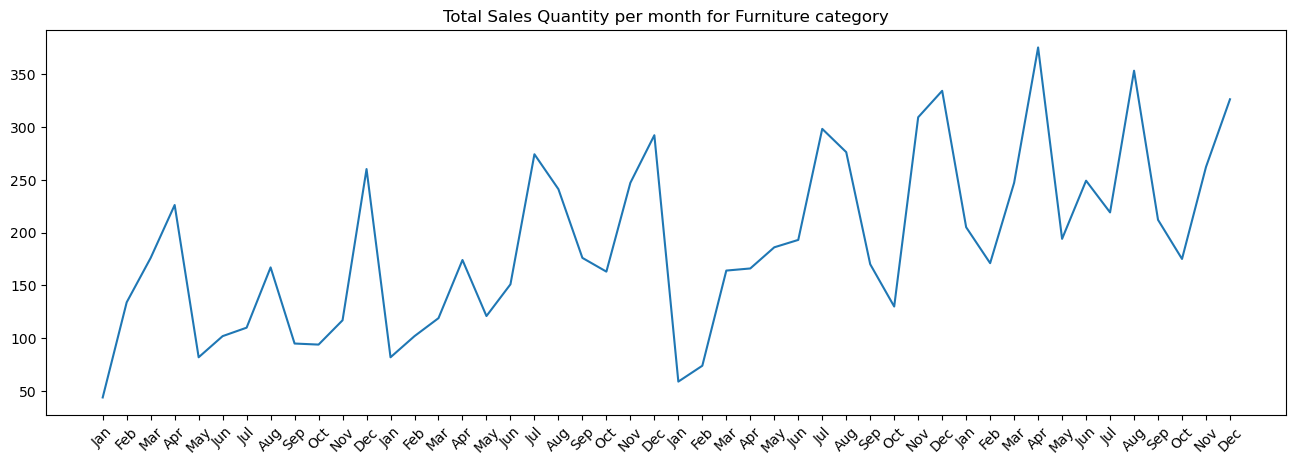

In [24]:
import matplotlib.pyplot as plt
FurnitureSalesQuantity=pd.crosstab(columns=FurnitureData['Month'],
                    index=FurnitureData['Year'],
                    values=FurnitureData['Quantity'],
                    aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct','Nov','Dec']*4

#Plotting the sales
FurnitureSalesQuantity.plot(kind='line', figsize=(16,5), title='Total Sales Quantity per month for Furniture category')
#Setting the x-axis labels
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=45)

#### Creating the predictive model for Furniture Category

Next six month forecast: 49    174.387955
50    193.505975
51    178.859962
52    336.161838
53    382.110764
54    195.721914
Name: Forecast, dtype: float64
#### Accuracy of the model: 73.04 ####


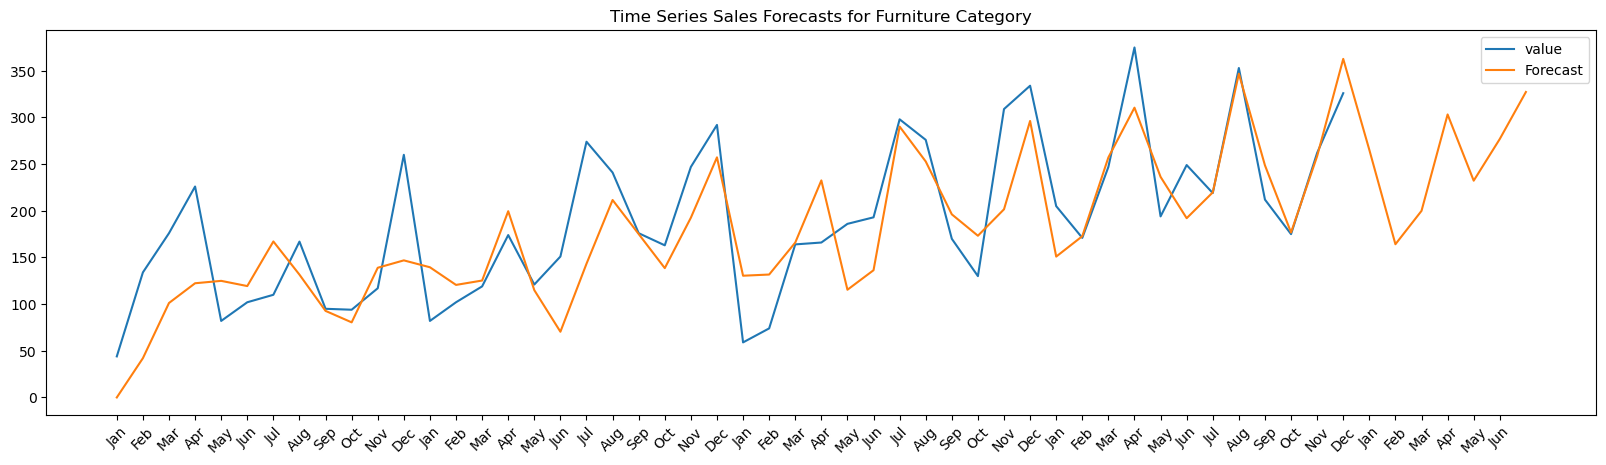

In [25]:
# Importing the algorithm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

#Train the model on full dataset
SarimaxModel=model=SARIMAX(FurnitureSalesQuantity,
                          order = (7,0,1),
                          seasonal_order = (6,0,0,12))
FurnitureSalesModel= SarimaxModel.fit()

#forecast for next 6 months
Furnitureforecast= FurnitureSalesModel.predict(start=0,
                                        end=(len(FurnitureSalesQuantity))+6,
                                        typ='levels').rename('Forecast')

#plot the forecast values
FurnitureSalesQuantity.plot(figsize=(20,5), legend= True, title='Time Series Sales Forecasts for Furniture Category')
Furnitureforecast.plot(legend= True, figsize=(20,5))

print("Next six month forecast:",forecast[-6:])

#Measuring the accuracy of the model
MAPE=np.mean(abs(FurnitureSalesQuantity-Furnitureforecast)/FurnitureSalesQuantity)*100
print('#### Accuracy of the model:', round(100-MAPE,2), '####')

#printing month names in x axis
MonthNames=MonthNames+MonthNames[0:6]
plotLabels=plt.xticks(np.arange(0,54,1),MonthNames, rotation=45)